Olá, Matheus!

Meu nome é Ramon e te ajudarei neste projeto. Fico feliz em rever seu projeto hoje.

Ao ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberta a feedbacks e discussões sobre o tema.

Você encontrará meus comentários abaixo - **por favor, não os mova, modifique ou exclua**.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como esta:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>



<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Precisa de correções. O bloqueio requer algumas correções. O trabalho não pode ser aceito com os comentários em vermelho.
</div>

Você pode me responder usando isso:

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

Descrição do projeto:

Você trabalha na empresa de mineração Oleobrás. Sua tarefa é encontrar o melhor lugar para um novo poço.
Etapas para escolher o lugar:

* Coletar os parâmetros de poços de petróleo na região selecionada: a qualidade de petróleo e o volume de reservas;
* Construir um modelo para predizer o volume de reservas nos novos poços;
* Escolher os poços de petróleo que têm os maiores valores estimados;
* Escolher a região com o maior lucro total para os poços de petróleo selecionados.

Você tem dados sobre amostras de petróleo de três regiões. Os parâmetros de cada poço de petróleo na região já são conhecidos. Construa um modelo que te ajudará a escolher a região com a margem de lucro mais alta. Utilize a técnica de Bootstrapping para analisar lucro potencial e riscos.

Apenas regressão linear pode ser usada para o treinamento do modelo (o resto não são previsíveis o suficiente).

# Projeto Oleobrás

## Importando arquivos e preparando os dados

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression	
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [2]:
region0 = pd.read_csv('/datasets/geo_data_0.csv')
region1 = pd.read_csv("/datasets/geo_data_1.csv")
region2 = pd.read_csv("/datasets/geo_data_2.csv")
regions = [region0, region1, region2]

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [3]:
print(region0.info())
print("*"*50)
print(region1.info())
print("*"*50)
print(region2.info())
print("*"*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
**************************************************
<class 'pandas.core.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

In [4]:
print(region0.describe())
print("*"*50)
print(region1.describe())
print("*"*50)
print(region2.describe())
print("*"*50)

                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        0.500419       0.250143       2.502647      92.500000
std         0.871832       0.504433       3.248248      44.288691
min        -1.408605      -0.848218     -12.088328       0.000000
25%        -0.072580      -0.200881       0.287748      56.497507
50%         0.502360       0.250252       2.515969      91.849972
75%         1.073581       0.700646       4.715088     128.564089
max         2.362331       1.343769      16.003790     185.364347
**************************************************
                  f0             f1             f2        product
count  100000.000000  100000.000000  100000.000000  100000.000000
mean        1.141296      -4.796579       2.494541      68.825000
std         8.965932       5.119872       1.703572      45.944423
min       -31.609576     -26.358598      -0.018144       0.000000
25%        -6.298551     

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Treinamento do modelo

In [5]:
predictions = {}
targets = {}

In [6]:
for i in range(len(regions)):
    print(f"Region {i}")
    target = regions[i]['product']
    features = regions[i].drop(['product', "id"], axis=1)
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)
    
    model = LinearRegression()
    model.fit(features_train, target_train)

    predictions_valid = model.predict(features_valid)
    
    predictions[i] = predictions_valid
    targets[i] = target_valid
    # Model performance
    mse = mean_squared_error(target_valid, predictions_valid)
    r2 = r2_score(target_valid, predictions_valid)
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.2f}") 
    print(f"Volume médio de reservas - {regions[i]['product'].mean():.2f}")
    print("*"*35)

Region 0
MSE: 1412.21
R²: 0.28
Volume médio de reservas - 92.50
***********************************
Region 1
MSE: 0.80
R²: 1.00
Volume médio de reservas - 68.83
***********************************
Region 2
MSE: 1602.38
R²: 0.21
Volume médio de reservas - 95.00
***********************************


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Analise os resultados.

A partir dos resultados obtidos por região, podemos concluir que o modelo tem um desempenho diferente em cada região.

Na região 0, o MSE é alto e o R² é baixo, o que indica que o modelo não tem uma boa capacidade de previsão e explicação dos dados. Isso pode ser devido a uma falta de relação linear entre as variáveis ou a uma amostra desbalanceada. Além disso, o volume médio de reservas é relativamente alto, o que pode ser uma oportunidade para explorar poços na região.

Na região 1, o MSE é baixo e o R² é 1, o que indica um modelo com uma boa capacidade de previsão e explicação dos dados. Isso pode ser devido a uma relação linear forte entre as variáveis ou a uma amostra balanceada. Além disso, o volume médio de reservas é relativamente baixo, o que pode ser um fator a ser considerado na escolha de poços na região.

Na região 2, o MSE é alto e o R² é baixo, o que indica um modelo com uma baixa capacidade de previsão e explicação dos dados. Isso pode ser devido a uma falta de relação linear entre as variáveis ou a uma amostra desbalanceada. Além disso, o volume médio de reservas é relativamente alto, o que pode ser uma oportunidade para explorar poços na região.

Em resumo, os resultados mostram que o modelo tem um bom desempenho na região 1, enquanto tem um desempenho mediano na região 0 e uma baixa capacidade de previsão na região 2.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Prepare-se para o cálculo de lucro:

### Armazene todos os valores necessários para os cálculos em variáveis separadas.

### Calcule o volume de reservas suficiente para desenvolver um novo poço sem prejuizos. Compare o valor recebido com o valor médio de reservas em cada região.

In [7]:
quantidade_pocos = 200
custos_200_pocos = 100000000
receita_unitaria_product = 4500

valor_base_poco = custos_200_pocos / quantidade_pocos
volume_minimo_poco = valor_base_poco / receita_unitaria_product

volume_minimo_poco

111.11111111111111

O valor minimo de reserva que um poço deve ter para ser contruido para que o lucro seja igual ao custo (break even) é de 111 milhares de barris. (110 * 10^3)

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Forneça conclusões sobre a preparação para a etapa de cálculo de lucro.

A média das três regiões ficou abaixo do volume minimo para o break even da construção de um poço.
Uma análise levando em consideração apenas a média das regiões implica dizer que o investimento geraria prejuizo.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

## Escreva uma função para calcular lucro de um conjunto de poços de petróleo selecionados e predições do modelo:

In [8]:
def profit(target, predictions):
    predictions_sorted = predictions.sort_values(ascending=False)
    selected_points = target[predictions_sorted.index][:200]
    product = selected_points.sum()
    revenue = product * receita_unitaria_product
    cost = custos_200_pocos
    return revenue - cost

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Excelente que o código vetorizado
</div>

In [9]:
for i,j in zip(targets, predictions):
    print(f"Lucro Region{i}")
    print(profit(targets[i],pd.DataFrame(data = predictions[i],
                  index = targets[i].index, 
                  columns = ["predictions"])["predictions"]))
    print("*"*20)

Lucro Region0
33208260.43139851
********************
Lucro Region1
24150866.966815114
********************
Lucro Region2
27103499.635998324
********************


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto. Parabéns pelo uso da função zip()
</div>

## Calcule riscos e lucro para cada região:

### Utilize a técnica de bootstrapping com 1000 amostras para encontrar a distribuição de lucros.

In [26]:
state = np.random.RandomState(12345)

# cria uma lista para armazenar os resultados de cada região
results = []

# itera pelas regiões
for region in range(3):
    values = []
    
    # aplica o mesmo código para cada região
    for i in range(1000):
        target_subsample = targets[region].sample(n=500, replace=True, random_state=state)
        predictions_subsample = pd.DataFrame(data = predictions[region],
                      index = targets[region].index, 
                      columns = ["predictions"])["predictions"][target_subsample.index]

        values.append(profit(target_subsample, predictions_subsample))

    # armazena os resultados da região atual em uma lista
    values = pd.Series(values)
    results.append(values)

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto, porém há um pequeno detalhe: ao fazer bootstrapping, usamos toda a amostra com repetição. Aqui, você usou n=500.
</div>

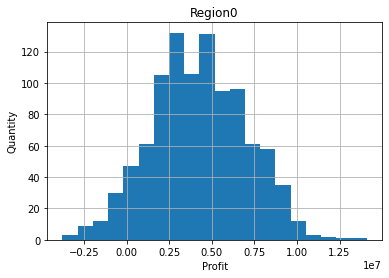

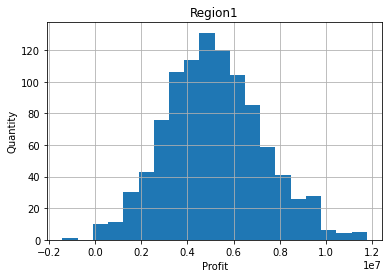

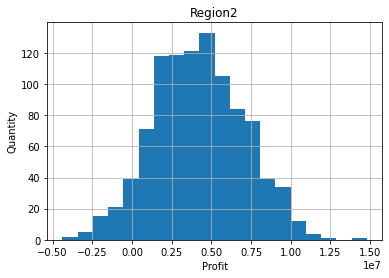

In [27]:
for i in range(len(regions)):
    plt.hist(results[i], bins = 20)
    plt.ylabel('Quantity')
    plt.xlabel(f'Profit')
    plt.title(f'Region{i}')
    plt.grid(True)
    plt.show()

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Encontre lucro médio, intervalo de confiança de 95% e risco de prejuízo. Prejuízo é um lucro negativo, calcule-o como uma probabilidade e depois o expresse como uma porcentagem.

In [12]:
for i in range(len(results)):
    print(f'Média Região {i}: {results[i].mean()}')

    confidence_interval = st.t.interval(
        0.95, len(results[i])-1, results[i].mean(), results[i].sem()) 

    print('intervalo de confiança de 95%:', confidence_interval)
    print(f"Risco de prejuízo Region{i} - {len(results[i][results[i] < 0]) * 100 / 1000}%")
    print("-"*50)

Média Região 0: 4259385.269105923
intervalo de confiança de 95%: (4087322.0706869857, 4431448.467524861)
Risco de prejuízo Region0 - 6.0%
--------------------------------------------------
Média Região 1: 5182594.93697325
intervalo de confiança de 95%: (5052498.815766218, 5312691.058180281)
Risco de prejuízo Region1 - 0.3%
--------------------------------------------------
Média Região 2: 4201940.0534405
intervalo de confiança de 95%: (4025287.0365036144, 4378593.070377386)
Risco de prejuízo Region2 - 6.2%
--------------------------------------------------


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Correto
</div>

### Apresente suas conclusões: sugira uma região para o desenvolvimento de poços de petróleo e justifique sua escolha.

O projeto Oleobrás teve como objetivo encontrar a melhor região para a construção de um novo poço de petróleo pela empresa. Para isso, foram coletados os parâmetros de poços de petróleo em três regiões diferentes e um modelo de regressão linear foi treinado para predizer o volume de reservas em novos poços. A região com o maior lucro total foi escolhida com base nos poços de petróleo selecionados. A técnica de Bootstrapping também foi utilizada para analisar o lucro potencial e os riscos associados. 

A partir da análise dos resultados obtidos no projeto, podemos concluir que o modelo de regressão linear utilizado apresentou um bom desempenho na região 1, um desempenho mediano na região 0 e uma baixa capacidade de previsão na região 2. Isso foi verificado pelas métricas de avaliação MSE e R², que medem o erro quadrático médio e a capacidade de explicação dos dados, respectivamente.

Após treinar e validar o modelo, analisamos os resultados e chegamos à conclusão de que a região 1 é a mais promissora em termos de margem de lucro e em termos de risco de prejuízo é a menor.


<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um excelente trabalho como sempre. Há apenas uma pequena observação quanto ao tamanho n do boostraping. Veja este link: https://www2.stat.duke.edu/courses/Spring20/sta199.002/slides/13-bootstrap.html#23 "ake a bootstrap sample - a random sample taken with replacement from the original sample, of the same size as the original sample."
</div>